### Principal Component Analysis (``PCA``)

Principal component analysis (``PCA``) is a linear dimensionality reduction technique with applications in exploratory data analysis, visualization and data preprocessing. 

The data is linearly transformed onto a new coordinate system such that the directions (principal components) capturing the largest variation in the data can be easily identified.

The principal components of a collection of points in a real coordinate space are a sequence of $p$ unit vectors, where the $i$-th vector is the direction of a line that best fits the data while being orthogonal to the first $i − 1$ vectors. Here, a best-fitting line is defined as one that minimizes the average squared perpendicular distance from the points to the line. These directions (i.e., principal components) constitute an orthonormal basis in which different individual dimensions of the data are linearly uncorrelated. 

Many studies use the first two principal components in order to plot the data in two dimensions and to visually identify clusters of closely related data points

In [ ]:
# Imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# Load data
#data = pd.read_csv(...)

In [ ]:
# Standard. : extract data
X = data.iloc[:,1:]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# PCA
pca = PCA()

# PCA on standard. data
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [ ]:
# Plot
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée')
plt.title('Variance expliquée par chaque composante principale')
plt.show()

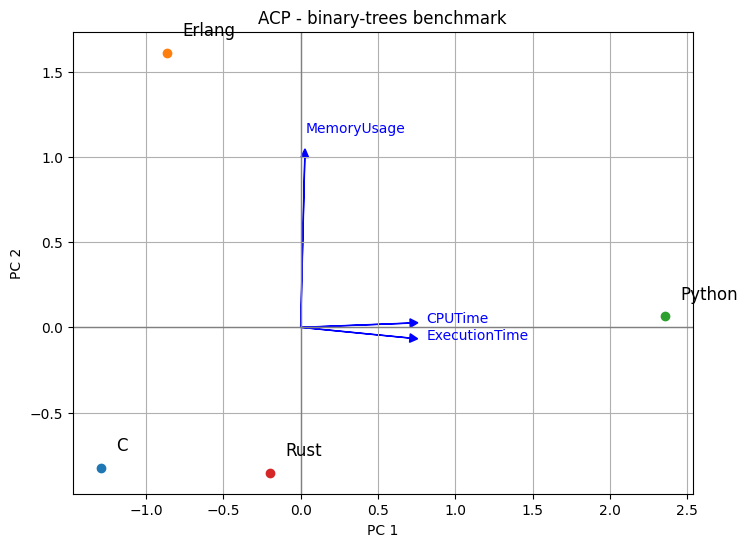

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Language': ['C', 'Erlang', 'Python', 'Rust'],
    'ExecutionTime': [5.00, 7.01, 37.02, 15.01],
    'CPUTime': [4.82, 9.22, 36.86, 14.15],
    'MemoryUsage': [132044.0, 1089692.0, 518392.0, 132804.0]
}

df = pd.DataFrame(data)

features = ['ExecutionTime', 'CPUTime', 'MemoryUsage']
X = df.loc[:, features].values
X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principalDf['Language'] = df['Language']

pca_loadings = pca.components_.T
fig, ax = plt.subplots(figsize=(8, 6))

for i, txt in enumerate(principalDf['Language']):
    ax.scatter(principalDf['PC1'][i], principalDf['PC2'][i])
    ax.text(principalDf['PC1'][i] + 0.1, principalDf['PC2'][i] + 0.1, txt, fontsize=12)

#circle = plt.Circle((0, 0), 1, color='gray', fill=False)
#ax.add_artist(circle)

for i in range(len(pca_loadings)):
    ax.arrow(0, 0, pca_loadings[i, 0], pca_loadings[i, 1], head_width=0.05, head_length=0.05, fc='blue', ec='blue')
    plt.text(pca_loadings[i, 0]* 1.15, pca_loadings[i, 1] * 1.15, features[i], color='blue')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('ACP - binary-trees benchmark')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid(True)

plt.show()